# Responsive Pie Chart Gallery

This notebook demonstrates how to create and display multiple pie charts in a responsive gallery view that automatically adjusts to the screen size.

## Import Required Libraries

First, we'll import the libraries needed for creating pie charts and displaying them in a responsive layout.

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import uuid
import io
import base64

## Generate Pie Charts

Next, we'll create sample data and generate multiple pie charts with different styles and colors.

In [2]:
# Function to generate a pie chart and convert it to base64 for embedding in HTML
def create_pie_chart(title, data, labels, colors=None, explode=None):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Create pie chart
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, 
           shadow=True, explode=explode, colors=colors)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(title)
    
    # Convert plot to base64 string
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')
    plt.close(fig)
    
    return image_base64

# Generate sample data for multiple pie charts
chart_data = [
    {
        'title': 'Energy Sources',
        'data': [35, 25, 20, 10, 10],
        'labels': ['Solar', 'Wind', 'Hydro', 'Nuclear', 'Fossil Fuels'],
        'colors': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
    },
    {
        'title': 'Waste Composition',
        'data': [45, 20, 15, 10, 10],
        'labels': ['Organic', 'Paper', 'Plastic', 'Glass', 'Metal'],
        'colors': ['#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462']
    },
    {
        'title': 'Carbon Emissions by Sector',
        'data': [30, 25, 20, 15, 10],
        'labels': ['Transport', 'Industry', 'Buildings', 'Agriculture', 'Other'],
        'colors': ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99']
    },
    {
        'title': 'Water Usage',
        'data': [40, 20, 15, 15, 10],
        'labels': ['Agriculture', 'Industry', 'Domestic', 'Energy', 'Other'],
        'colors': ['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']
    },
    {
        'title': 'Land Use',
        'data': [50, 20, 15, 10, 5],
        'labels': ['Agriculture', 'Forest', 'Urban', 'Grassland', 'Wetland'],
        'colors': ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
    },
    {
        'title': 'Biodiversity Loss Causes',
        'data': [35, 25, 20, 15, 5],
        'labels': ['Habitat Loss', 'Climate Change', 'Pollution', 'Overexploitation', 'Invasive Species'],
        'colors': ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
    }
]

# Generate pie charts
pie_charts = []
for chart in chart_data:
    explode = None
    if 'explode' in chart:
        explode = chart['explode']
    image_base64 = create_pie_chart(
        chart['title'], 
        chart['data'], 
        chart['labels'], 
        colors=chart['colors'],
        explode=explode
    )
    pie_charts.append({
        'title': chart['title'],
        'image': image_base64
    })

print(f"Generated {len(pie_charts)} pie charts")

Generated 6 pie charts


## Display Pie Charts in a Gallery View

Now we'll create an HTML layout to display the pie charts in a grid format.


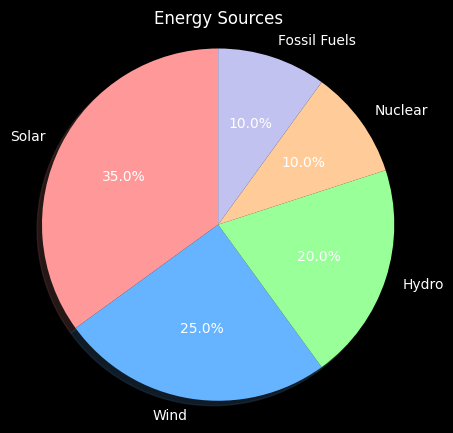
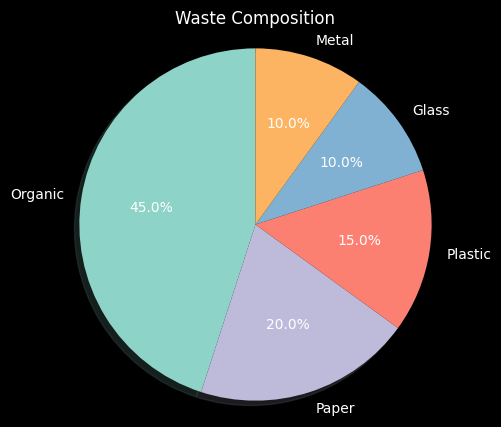
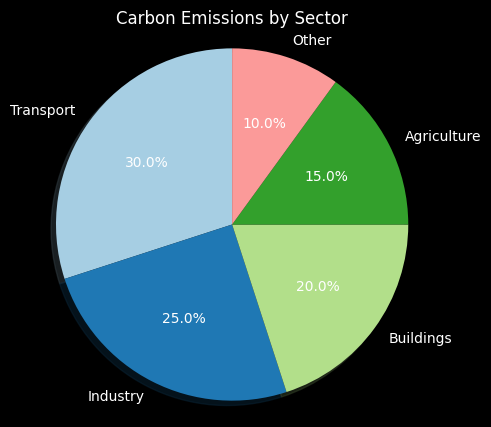
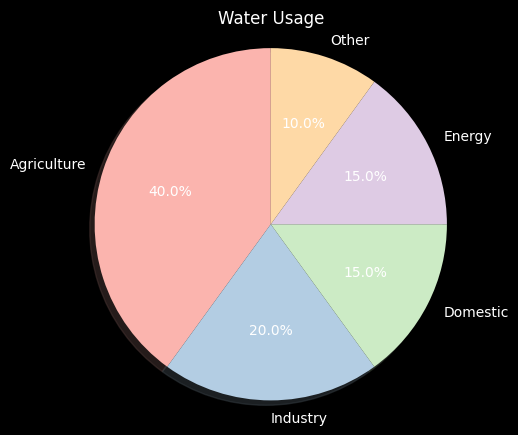
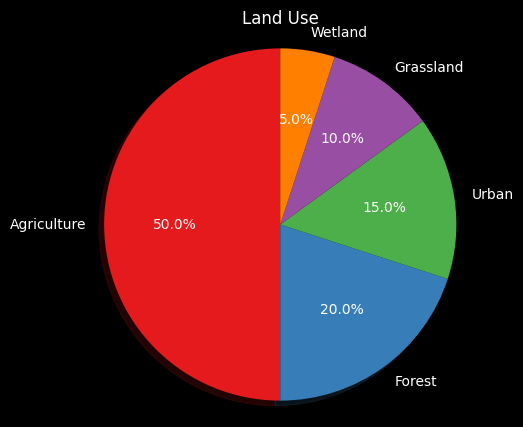
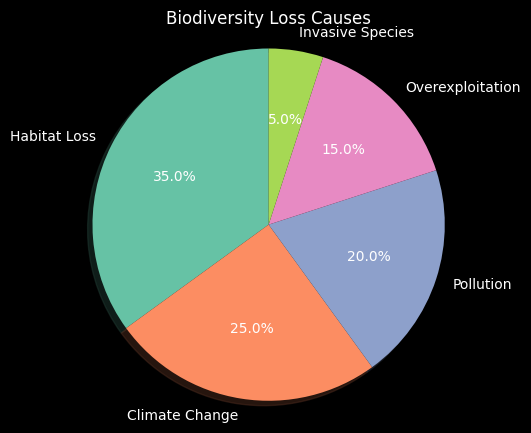

In [3]:
# Function to create HTML for pie chart gallery
def create_gallery_html(pie_charts):
    html = """
    <style>
        .gallery-container {
            display: flex;
            flex-wrap: wrap;
            justify-content: space-around;
            gap: 20px;
            margin: 20px 0;
        }
        .chart-item {
            flex-basis: calc(33.333% - 20px);
            min-width: 250px;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            border-radius: 8px;
            overflow: hidden;
            transition: transform 0.3s ease;
            background-color: white;
        }
        .chart-item:hover {
            transform: translateY(-5px);
            box-shadow: 0 6px 12px rgba(0,0,0,0.15);
        }
        .chart-title {
            padding: 10px;
            text-align: center;
            font-weight: bold;
            border-bottom: 1px solid #eee;
        }
        .chart-image {
            padding: 10px;
            text-align: center;
        }
        .chart-image img {
            max-width: 100%;
            height: auto;
        }
        
        /* Responsive adjustments */
        @media (max-width: 900px) {
            .chart-item {
                flex-basis: calc(50% - 20px);
            }
        }
        @media (max-width: 600px) {
            .chart-item {
                flex-basis: 100%;
            }
        }
    </style>
    <div class="gallery-container">
    """
    
    for chart in pie_charts:
        html += f"""
        <div class="chart-item">
            <div class="chart-title">{chart['title']}</div>
            <div class="chart-image">
                <img src="data:image/png;base64,{chart['image']}" alt="{chart['title']}">
            </div>
        </div>
        """
    
    html += """
    </div>
    """
    return html

# Display the gallery
gallery_html = create_gallery_html(pie_charts)
display(HTML(gallery_html))

## Make the Gallery Responsive

The gallery is already responsive with CSS, but let's add some interactive controls using IPyWidgets to adjust the layout dynamically.

In [4]:
import ipywidgets as widgets
from IPython.display import clear_output

# Create widgets for controlling the gallery
columns_slider = widgets.IntSlider(
    value=3,
    min=1,
    max=5,
    step=1,
    description='Columns:',
    disabled=False,
    continuous_update=False
)

gap_slider = widgets.IntSlider(
    value=20,
    min=0,
    max=50,
    step=5,
    description='Gap (px):',
    disabled=False,
    continuous_update=False
)

color_theme = widgets.Dropdown(
    options=['Default (White)', 'Light Gray', 'Dark Theme', 'Colorful'],
    value='Default (White)',
    description='Theme:',
    disabled=False,
)

# Function to update the gallery display based on widget values
def update_gallery(columns, gap, theme):
    # Define theme color schemes
    themes = {
        'Default (White)': {
            'background': 'white',
            'shadow': '0 4px 8px rgba(0,0,0,0.1)',
            'text': 'black',
            'container_bg': 'transparent'
        },
        'Light Gray': {
            'background': '#f5f5f5',
            'shadow': '0 4px 8px rgba(0,0,0,0.1)',
            'text': '#333333',
            'container_bg': '#eeeeee'
        },
        'Dark Theme': {
            'background': '#2d2d2d',
            'shadow': '0 4px 8px rgba(0,0,0,0.3)',
            'text': '#ffffff',
            'container_bg': '#222222'
        },
        'Colorful': {
            'background': 'linear-gradient(145deg, #f6f9ff, #e3ffef)',
            'shadow': '0 4px 15px rgba(66, 133, 244, 0.15)',
            'text': '#333333',
            'container_bg': 'rgba(255,255,255,0.7)'
        }
    }
    
    theme_style = themes[theme]
    
    html = f"""
    <style>
        .gallery-container {{
            display: flex;
            flex-wrap: wrap;
            justify-content: space-around;
            gap: {gap}px;
            margin: 20px 0;
            background: {theme_style['container_bg']};
            padding: 20px;
            border-radius: 10px;
        }}
        .chart-item {{
            flex-basis: calc({100/columns}% - {gap}px);
            min-width: 200px;
            box-shadow: {theme_style['shadow']};
            border-radius: 8px;
            overflow: hidden;
            transition: all 0.3s ease;
            background: {theme_style['background']};
        }}
        .chart-item:hover {{
            transform: translateY(-5px);
            box-shadow: 0 6px 12px rgba(0,0,0,0.2);
        }}
        .chart-title {{
            padding: 10px;
            text-align: center;
            font-weight: bold;
            border-bottom: 1px solid #eee;
            color: {theme_style['text']};
        }}
        .chart-image {{
            padding: 10px;
            text-align: center;
        }}
        .chart-image img {{
            max-width: 100%;
            height: auto;
        }}
        
        /* Responsive adjustments */
        @media (max-width: 900px) {{
            .chart-item {{
                flex-basis: calc(50% - {gap}px);
            }}
        }}
        @media (max-width: 600px) {{
            .chart-item {{
                flex-basis: 100%;
            }}
        }}
    </style>
    <div class="gallery-container">
    """
    
    for chart in pie_charts:
        html += f"""
        <div class="chart-item">
            <div class="chart-title">{chart['title']}</div>
            <div class="chart-image">
                <img src="data:image/png;base64,{chart['image']}" alt="{chart['title']}">
            </div>
        </div>
        """
    
    html += """
    </div>
    """
    clear_output(wait=True)
    display(widgets.HBox([columns_slider, gap_slider, color_theme]))
    display(HTML(html))

# Create interactive widget handler
def on_value_change(change):
    update_gallery(columns_slider.value, gap_slider.value, color_theme.value)

columns_slider.observe(on_value_change, names='value')
gap_slider.observe(on_value_change, names='value')
color_theme.observe(on_value_change, names='value')

# Initial display
update_gallery(columns_slider.value, gap_slider.value, color_theme.value)

ModuleNotFoundError: No module named 'ipywidgets'

## Conclusion

This notebook demonstrates how to create a responsive gallery of pie charts that can adapt to different screen sizes and user preferences. The gallery uses:

1. Matplotlib for generating the pie charts
2. Base64 encoding to embed images in HTML
3. CSS Flexbox for responsive layout
4. IPyWidgets for interactive controls

You can customize this approach for your own data visualization needs by:
- Adding more charts or different chart types
- Customizing the visual styles and themes
- Adding filters or sorting options for the gallery
- Integrating with real-time data sources